# Estatísticas

Esse programa lê arquivos de dados, particularmente da CETESB, e calcula as principais estatísticas da média anual, mensal, horária, boxplot, histograma, percentil, máximas e mínimas, de variáveis como precipitação, temperatura, umidade relativa, radiação, componente zonal e meridional do vento e pressão, dos anos 2002 a 2022.

In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

import numpy as np

import pandas as pd

from matplotlib.ticker import StrMethodFormatter

from netCDF4 import Dataset
from matplotlib.ticker import AutoMinorLocator

from datetime import datetime, timedelta

In [2]:
anoini = 2002
anofim = 2022

Main Variables

In [3]:
pp   = np.zeros((anofim+1-anoini,13,32,25))
uv   = np.zeros((anofim+1-anoini,13,32,25))
vv   = np.zeros((anofim+1-anoini,13,32,25))
nox  = np.zeros((anofim+1-anoini,13,32,25))
mp25 = np.zeros((anofim+1-anoini,13,32,25))
pr   = np.zeros((anofim+1-anoini,13,32,25))
ur   = np.zeros((anofim+1-anoini,13,32,25))
tp   = np.zeros((anofim+1-anoini,13,32,25))
rd   = np.zeros((anofim+1-anoini,13,32,25))

Monthly Averages

In [4]:
ppmonth = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
uvmonth = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
vvmonth = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
noxmonth = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
mp25month = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
prmonth = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
urmonth = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
tpmonth = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
rdmonth = [[],[],[],[],[],[],[],[],[],[],[],[],[]]

Hourly Averages

In [5]:
pphour  = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
uvhour  = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
vvhour  = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
noxhour  = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
mp25hour  = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
prhour  = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
urhour  = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
tphour  = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
rdhour  = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

All

In [6]:
pptudo = []
uvtudo = []
vvtudo = []
noxtudo = []
mp25tudo = []
prtudo = []
urtudo = []
tptudo = []
rdtudo = []

ultdia = [0,31,28,31,30,31,30,31,31,30,31,30,31]

Iniciate arrays with nan

In [7]:
pp[:][:][:][:]   = np.nan
uv[:][:][:][:]   = np.nan
vv[:][:][:][:]   = np.nan
nox[:][:][:][:]  = np.nan
mp25[:][:][:][:] = np.nan
pr[:][:][:][:]   = np.nan
ur[:][:][:][:]   = np.nan
tp[:][:][:][:]   = np.nan
rd[:][:][:][:]   = np.nan

Abre arquivos de entrada e lê dados de todos os anos

In [8]:
for an in range(anoini,anofim+1): 
	nomearq = str(an)+'.csv'
	
	entra = open(nomearq,'r',encoding='iso-8859-9')
	ct = 0
	for line in entra:
		ct += 1
#		
		if line[:4] != 'Esta' and line[2:6] != 'digo' and line[:4] != 'Data' and line[:4] != 'Data' and line[:4] != 'Nome' and len(line) > 1:
			
			EST,DATAHORA,VV10,VV2,DV,RAD,REFL,GRD,UR,TP,TS03,TS06,TS18,PRESS,PRECIP = line.split(';')
			DATA,HORA = DATAHORA.split(' ')
			if len(DATA) > 0 and len(HORA) > 0:
				axano,axmes,axdia = DATA.split('-')
				axhora,axminutos,segundos  = HORA.split(':')
				dd = int(axdia)
				mm = int(axmes)
				aa = int(axano)
				hh = int(axhora)
				if hh == 0:
					hh = 24
					dd -= 1
					if dd == 0:
						mm -= 1
						if mm == 0:
							mm = 12
							aa -= 1
						dd = ultdia[mm]
						if mm == 2 and (aa == 2012 or aa == 2016 or aa == 2020):
							dd += 1
				if len(TP) > 0:
					if TP != np.nan and TP != '\\N':
						if float(TP) < 50. and float(TP) > -10.:
							tp[aa-anoini][mm][dd][hh] = float(TP)
							tpmonth[mm].append(float(TP))
							tphour[hh].append(float(TP))
							tptudo.append(float(TP))
							if float(TP) > 40.:
								print(ct,line)
				if len(UR) > 0:
					if UR != np.nan:
						if float(UR) > 0.:
							ur[aa-anoini][mm][dd][hh] = float(UR)
							urmonth[mm].append(float(UR))
							urhour[hh].append(float(UR))
							urtudo.append(float(UR))
				if len(PRESS) > 0:
					if PRESS != np.nan and PRESS != '\\N':
						if float(PRESS) > 0. and float(PRESS) < 1050.:
							pr[aa-anoini][mm][dd][hh] = float(PRESS)
							prmonth[mm].append(float(PRESS))
							prhour[hh].append(float(PRESS))
							prtudo.append(float(PRESS))
				axvv =np.nan
				axdv =np.nan
				if len(VV2) > 0:
					if VV2 != np.nan:
						axvv = float(VV2)
				if len(DV) > 0 and DV != '\n':
					if DV != np.nan and DV != '\n':
						axdv = float(DV)
				if axvv != np.nan and axdv != np.nan and axvv > 0.:
					axu = -abs(axvv)*math.sin((math.pi/180.)*axdv)
					axv = -abs(axvv)*math.cos((math.pi/180.)*axdv)
					uv[aa-anoini][mm][dd][hh] = axu
					uvmonth[mm].append(axu)
					uvhour[hh].append(axu)
					uvtudo.append(axu)
					vv[aa-anoini][mm][dd][hh] = axv
					vvmonth[mm].append(axv)
					vvhour[hh].append(axv)
					vvtudo.append(axv)
				if len(RAD) > 0 and RAD != '\n':
					if RAD != np.nan and RAD != '\n':
						if float(RAD) >= 0. and float(RAD) < 1350.:
							rd[aa-anoini][mm][dd][hh] = float(RAD)
							rdmonth[mm].append(float(RAD))
							rdhour[hh].append(float(RAD))
							rdtudo.append(float(RAD))

				if len(PRECIP) > 0 and PRECIP != '\n':
					if PRECIP != np.nan and PRECIP != '\n':
						if float(PRECIP) >= 0.:
							pp[aa-anoini][mm][dd][hh] = float(PRECIP)
							ppmonth[mm].append(float(PRECIP))
							pphour[hh].append(float(PRECIP))
							pptudo.append(float(PRECIP))
	entra.close()

952 RibeirÃ£o Preto;2022-02-09 14:00:00;1.784;0.23;178.1;880;0;1.901;66.31;47.09;29.73;30.33;28.02;-1752;0

953 RibeirÃ£o Preto;2022-02-09 15:00:00;1.833;0.29;151.9;825;0;4.512;61.91;47.67;29.93;30.33;28.02;-1695;0

1053 RibeirÃ£o Preto;2022-02-13 19:00:00;0.2;0.07;241.7;51.92;0;8.53;58.81;49.25;31.35;30.85;28.24;-2861;0

1071 RibeirÃ£o Preto;2022-02-14 13:00:00;0.9;0.2;338.9;531.2;0;3.707;64.46;49.56;30.28;31;28.36;-3492;0



Report

In [9]:
report = open('Relat-CIIAGRO-Rib-Preto.txt','w')
report.write('Relatório das variáveis medidas pela CIIAGRO em Ribeirão Preto (lat , lon )\n')
report.write('Período: de '+str(anoini)+' a '+str(anofim)+'\n')
report.write(' \n')

2

### Annual averages

In [10]:
ppyearave = []
ppyearstd = []
noxyearave = []
noxyearstd = []
mp25yearave = []
mp25yearstd = []
ppyearave = []
ppyearstd = []
tpyearave = []
tpyearstd = []
uryearave = []
uryearstd = []
rdyearave = []
rdyearstd = []
uvyearave = []
uvyearstd = []
vvyearave = []
vvyearstd = []
pryearave = []
pryearstd = []
report.write('Medias anuais \n')
for an in range(anoini,anofim+1):
	report.write('PRECIP-> '+str(an)+' '+str(np.nansum(pp[an-anoini][:][:][:]))+' '+str(pp[an-anoini].size-np.count_nonzero(np.isnan(pp[an-anoini])))+'\n')
	ppyearave.append(np.nansum(pp[an-anoini][:][:][:]))
	report.write('TP-> '+str(an)+' '+str(np.nanmean(tp[an-anoini][:][:][:]))+' '+str(tp[an-anoini].size-np.count_nonzero(np.isnan(tp[an-anoini])))+' '+str(np.nanstd(tp[an-anoini][:][:][:]))+'\n')
	tpyearave.append(np.nanmean(tp[an-anoini][:][:][:]))
	tpyearstd.append(np.nanstd(tp[an-anoini][:][:][:]))
	report.write('UR-> '+str(an)+' '+str(np.nanmean(ur[an-anoini][:][:][:]))+' '+str(ur[an-anoini].size-np.count_nonzero(np.isnan(ur[an-anoini])))+' '+str(np.nanstd(ur[an-anoini][:][:][:]))+'\n')
	uryearave.append(np.nanmean(ur[an-anoini][:][:][:]))
	uryearstd.append(np.nanstd(ur[an-anoini][:][:][:]))
	report.write('Rad-> '+str(an)+' '+str(np.nanmean(rd[an-anoini][:][:][:]))+' '+str(rd[an-anoini].size-np.count_nonzero(np.isnan(rd[an-anoini])))+' '+str(np.nanstd(rd[an-anoini][:][:][:]))+'\n')
	rdyearave.append(np.nanmean(rd[an-anoini][:][:][:]))
	rdyearstd.append(np.nanstd(rd[an-anoini][:][:][:]))
	report.write('U-> '+str(an)+' '+str(np.nanmean(uv[an-anoini][:][:][:]))+' '+str(uv[an-anoini].size-np.count_nonzero(np.isnan(uv[an-anoini])))+' '+str(np.nanstd(uv[an-anoini][:][:][:]))+'\n')
	uvyearave.append(np.nanmean(uv[an-anoini][:][:][:]))
	uvyearstd.append(np.nanstd(uv[an-anoini][:][:][:]))
	report.write('V-> '+str(an)+' '+str(np.nanmean(vv[an-anoini][:][:][:]))+' '+str(vv[an-anoini].size-np.count_nonzero(np.isnan(vv[an-anoini])))+' '+str(np.nanstd(vv[an-anoini][:][:][:]))+'\n')
	vvyearave.append(np.nanmean(vv[an-anoini][:][:][:]))
	vvyearstd.append(np.nanstd(vv[an-anoini][:][:][:]))
	report.write('Press > '+str(an)+' '+str(np.nanmean(pr[an-anoini][:][:][:]))+' '+str(pr[an-anoini].size-np.count_nonzero(np.isnan(pr[an-anoini])))+' '+str(np.nanstd(pr[an-anoini][:][:][:]))+'\n')
	pryearave.append(np.nanmean(pr[an-anoini][:][:][:]))
	pryearstd.append(np.nanstd(pr[an-anoini][:][:][:]))

C:\Users\beatr\AppData\Local\Temp\ipykernel_18760\3570450004.py:34: RuntimeWarning: Mean of empty slice
  report.write('U-> '+str(an)+' '+str(np.nanmean(uv[an-anoini][:][:][:]))+' '+str(uv[an-anoini].size-np.count_nonzero(np.isnan(uv[an-anoini])))+' '+str(np.nanstd(uv[an-anoini][:][:][:]))+'\n')
c:\Users\beatr\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\beatr\AppData\Local\Temp\ipykernel_18760\3570450004.py:35: RuntimeWarning: Mean of empty slice
  uvyearave.append(np.nanmean(uv[an-anoini][:][:][:]))
C:\Users\beatr\AppData\Local\Temp\ipykernel_18760\3570450004.py:37: RuntimeWarning: Mean of empty slice
  report.write('V-> '+str(an)+' '+str(np.nanmean(vv[an-anoini][:][:][:]))+' '+str(vv[an-anoini].size-np.count_nonzero(np.isnan(vv[an-anoini])))+' '+str(np.nanstd(vv[an-anoini][:][:][:]))+'\n')
C:\Users\beatr\AppData\Local\

### Monthly averages

In [11]:
ppmonthave = []
ppmonthstd = []
noxmonthave = []
noxmonthstd = []
mp25monthave = []
mp25monthstd = []
tpmonthave = []
tpmonthstd = []
urmonthave = []
urmonthstd = []
rdmonthave = []
rdmonthstd = []
prmonthave = []
prmonthstd = []
uvmonthave = []
uvmonthstd = []
vvmonthave = []
vvmonthstd = []
report.write('Medias mensais \n')

for mm in range (1,13):
	report.write('PRECIP-> '+str(mm)+' '+str(np.sum(ppmonth[mm]))+' medidas validas: '+str(len(ppmonth[mm]))+'\n')
	ppmonthave.append(np.sum(ppmonth[mm]))
	report.write('TP-> '+str(mm)+' '+str(np.mean(tpmonth[mm]))+' medidas validas: '+str(len(tpmonth[mm]))+' '+str(np.std(tpmonth[mm]))+'\n')
	tpmonthave.append(np.mean(tpmonth[mm]))
	tpmonthstd.append(np.std(tpmonth[mm]))
	report.write('UR-> '+str(mm)+' '+str(np.mean(urmonth[mm]))+' medidas validas: '+str(len(urmonth[mm]))+' '+str(np.std(urmonth[mm]))+'\n')
	urmonthave.append(np.mean(urmonth[mm]))
	urmonthstd.append(np.std(urmonth[mm]))
	report.write('Rad-> '+str(mm)+' '+str(np.mean(rdmonth[mm]))+' medidas validas: '+str(len(rdmonth[mm]))+' '+str(np.std(rdmonth[mm]))+'\n')
	rdmonthave.append(np.mean(rdmonth[mm]))
	rdmonthstd.append(np.std(rdmonth[mm]))
	report.write('U-> '+str(mm)+' '+str(np.mean(uvmonth[mm]))+' medidas validas: '+str(len(uvmonth[mm]))+' '+str(np.std(uvmonth[mm]))+'\n')
	uvmonthave.append(np.mean(uvmonth[mm]))
	uvmonthstd.append(np.std(uvmonth[mm]))
	report.write('V-> '+str(mm)+' '+str(np.mean(vvmonth[mm]))+' medidas validas: '+str(len(vvmonth[mm]))+' '+str(np.std(vvmonth[mm]))+'\n')
	vvmonthave.append(np.mean(vvmonth[mm]))
	vvmonthstd.append(np.std(vvmonth[mm]))
	report.write('Press-> '+str(mm)+' '+str(np.mean(prmonth[mm]))+' medidas validas: '+str(len(prmonth[mm]))+' '+str(np.std(prmonth[mm]))+'\n')
	prmonthave.append(np.mean(prmonth[mm]))
	prmonthstd.append(np.std(prmonth[mm]))


### Hourly averages

In [12]:
noxhourave = []
noxhourstd = []
mp25hourave = []
mp25hourstd = []
tphourave = []
tphourstd = []
urhourave = []
urhourstd = []
rdhourave = []
rdhourstd = []
uvhourave = []
uvhourstd = []
vvhourave = []
vvhourstd = []
prhourave = []
prhourstd = []
report.write('Medias horarias \n')
for hh in range (1,25):
	report.write('TP-> '+str(hh)+' '+str(np.mean(tphour[hh]))+' medidas validas: '+str(len(tphour[hh]))+' '+str(np.std(tphour[hh]))+'\n')
	tphourave.append(np.mean(tphour[hh]))
	tphourstd.append(np.std(tphour[hh]))
	report.write('UR-> '+str(hh)+' '+str(np.mean(urhour[hh]))+' medidas validas: '+str(len(urhour[hh]))+' '+str(np.std(urhour[hh]))+'\n')
	urhourave.append(np.mean(urhour[hh]))
	urhourstd.append(np.std(urhour[hh]))
	report.write('Rad-> '+str(hh)+' '+str(np.mean(rdhour[hh]))+' medidas validas: '+str(len(rdhour[hh]))+' '+str(np.std(rdhour[hh]))+'\n')
	rdhourave.append(np.mean(rdhour[hh]))
	rdhourstd.append(np.std(rdhour[hh]))
	report.write('U-> '+str(hh)+' '+str(np.mean(uvhour[hh]))+' medidas validas: '+str(len(uvhour[hh]))+' '+str(np.std(uvhour[hh]))+'\n')
	uvhourave.append(np.mean(uvhour[hh]))
	uvhourstd.append(np.std(uvhour[hh]))
	report.write('V-> '+str(hh)+' '+str(np.mean(vvhour[hh]))+' medidas validas: '+str(len(vvhour[hh]))+' '+str(np.std(vvhour[hh]))+'\n')
	vvhourave.append(np.mean(vvhour[hh]))
	vvhourstd.append(np.std(vvhour[hh]))
	report.write('Press-> '+str(hh)+' '+str(np.mean(prhour[hh]))+' medidas validas: '+str(len(prhour[hh]))+' '+str(np.std(prhour[hh]))+'\n')
	prhourave.append(np.mean(prhour[hh]))
	prhourstd.append(np.std(prhour[hh]))

### Graphics

In [13]:
years = np.arange(anoini,anofim+1)
months = np.arange(1,13)
hours = np.arange(1,25)

## Precipitation

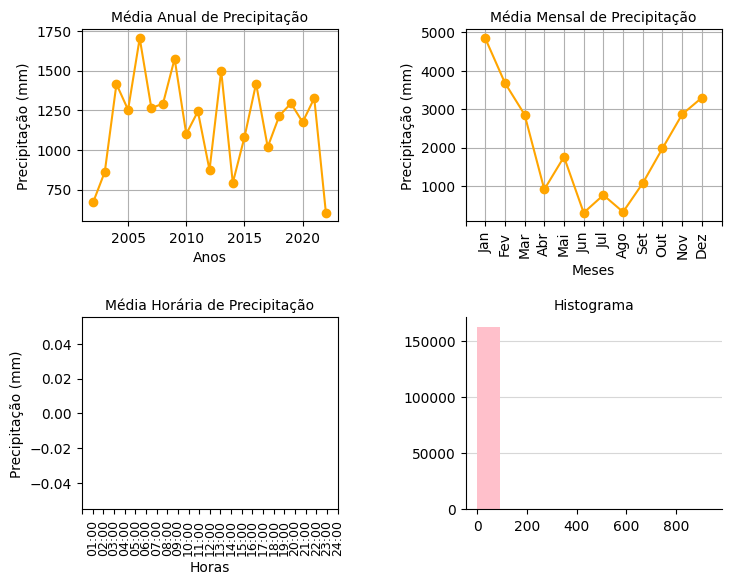

In [14]:
fig,axs = plt.subplots(2,2)

axs[0,0].grid()
axs[0,0].plot(years,ppyearave, color = 'orange', marker = 'o')
axs[0,0].set_title('Média Anual de Precipitação', fontsize = 10)
axs[0,0].set_xlabel('Anos')
axs[0,0].set_ylabel('Precipitação (mm)')

axs[0,1].grid()
axs[0,1].plot(months,ppmonthave, color = 'orange', marker ='o')
axs[0,1].set_title('Média Mensal de Precipitação', fontsize = 10)
axs[0,1].set_xlabel('Meses')
axs[0,1].set_xticks(range(14), ['', 'Jan','Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez', ''], rotation=90)
axs[0,1].set_ylabel('Precipitação (mm)')

axs[1,0].plot()
axs[1,0].set_title('Média Horária de Precipitação', fontsize = 10)
axs[1,0].set_xlabel('Horas')
axs[1,0].set_ylabel('Precipitação (mm)')
axs[1,0].set_xticks(range(0, 25), ['', '01:00','02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00','13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '24:00'], rotation=90, fontsize=9)

axs[1,1].hist(pptudo, color='pink')
axs[1,1].set_title('Histograma', fontsize = 10)
axs[1,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].grid(alpha=0.5, axis='y')
axs[1,1].set_axisbelow(True)

plt.subplots_adjust(bottom = 4.0,
                    top = 5.0,
                    left = 2.0,
                    right = 3.0,
                    wspace = 0.5,
                    hspace=0.5)

## Temperature

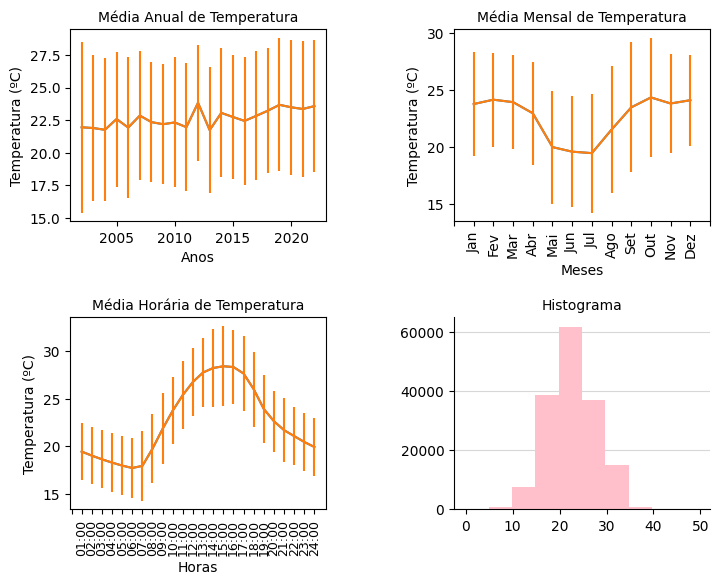

In [15]:
fig,axs = plt.subplots(2,2)

axs[0,0].plot(years,tpyearave)
axs[0,0].errorbar(years,tpyearave,tpyearstd)
axs[0,0].set_xlabel('Anos')
axs[0,0].set_ylabel('Temperatura (ºC)')
axs[0,0].set_title('Média Anual de Temperatura', fontsize = 10)

axs[0,1].plot(months,tpmonthave)
axs[0,1].errorbar(months,tpmonthave,tpmonthstd)
axs[0,1].set_title('Média Mensal de Temperatura', fontsize = 10)
axs[0,1].set_xlabel('Meses')
axs[0,1].set_ylabel('Temperatura (ºC)')
axs[0,1].set_xticks(range(14), ['', 'Jan','Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez', ''], rotation=90)

axs[1,0].plot(hours,tphourave)
axs[1,0].errorbar(hours,tphourave,tphourstd)
axs[1,0].set_title('Média Horária de Temperatura', fontsize = 10)
axs[1,0].set_xlabel('Horas')
axs[1,0].set_ylabel('Temperatura (ºC)')
axs[1,0].set_xticks(range(0, 25), ['', '01:00','02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00','13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '24:00'], rotation=90, fontsize=9)

axs[1,1].hist(tptudo, color='pink')
axs[1,1].set_title('Histograma', fontsize = 10)
axs[1,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].grid(alpha=0.5, axis='y')
axs[1,1].set_axisbelow(True)

plt.subplots_adjust(bottom = 4.0,
                    top = 5.0,
                    left = 2.0,
                    right = 3.0,
                    wspace = 0.5,
                    hspace=0.5)

## Relative Humidity

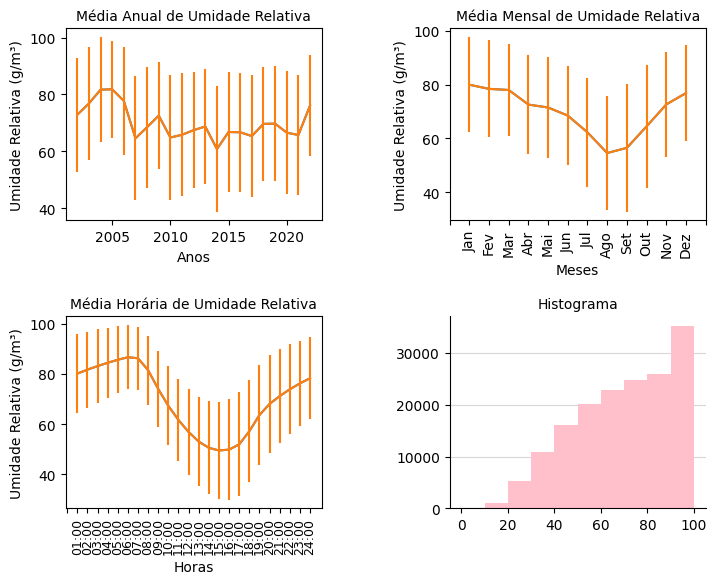

In [16]:
fig,axs = plt.subplots(2,2)

axs[0,0].plot(years,uryearave)
axs[0,0].errorbar(years,uryearave,uryearstd)
axs[0,0].set_title('Média Anual de Umidade Relativa', fontsize = 10)
axs[0,0].set_xlabel('Anos')
axs[0,0].set_ylabel('Umidade Relativa (g/m³)')

axs[0,1].plot(months,urmonthave)
axs[0,1].errorbar(months,urmonthave,urmonthstd)
axs[0,1].set_title('Média Mensal de Umidade Relativa', fontsize = 10)
axs[0,1].set_xlabel('Meses')
axs[0,1].set_ylabel('Umidade Relativa (g/m³)')
axs[0,1].set_xticks(range(14), ['', 'Jan','Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez', ''], rotation=90)

axs[1,0].plot(hours,urhourave)
axs[1,0].errorbar(hours,urhourave,urhourstd)
axs[1,0].set_title('Média Horária de Umidade Relativa', fontsize = 10)
axs[1,0].set_xlabel('Horas')
axs[1,0].set_ylabel('Umidade Relativa (g/m³)')
axs[1,0].set_xticks(range(0, 25), ['', '01:00','02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00','13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '24:00'], rotation=90, fontsize=9)

axs[1,1].hist(urtudo, color = 'pink')
axs[1,1].set_title('Histograma', fontsize = 10)
axs[1,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].grid(alpha=0.5, axis='y')
axs[1,1].set_axisbelow(True)

plt.subplots_adjust(bottom = 4.0,
                    top = 5.0,
                    left = 2.0,
                    right = 3.0,
                    wspace = 0.5,
                    hspace=0.5)

## Radiation

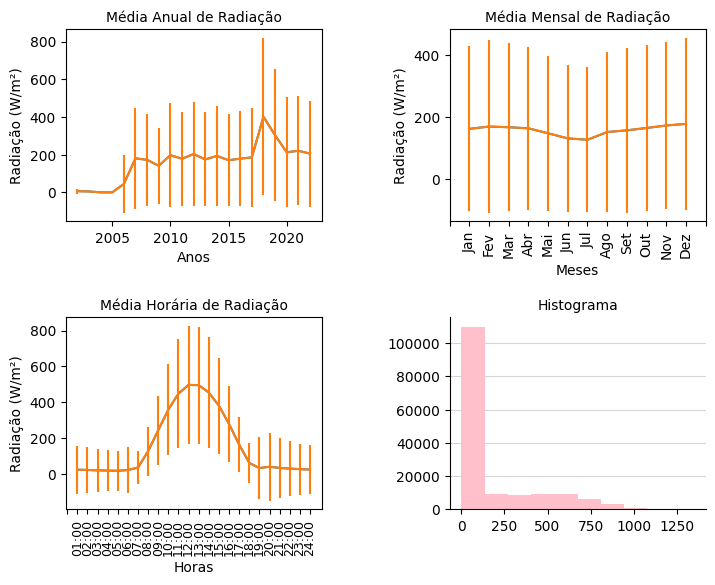

In [17]:
fig,axs = plt.subplots(2,2)

axs[0,0].plot(years,rdyearave)
axs[0,0].errorbar(years,rdyearave,rdyearstd)
axs[0,0].set_title('Média Anual de Radiação', fontsize = 10)
axs[0,0].set_xlabel('Anos')
axs[0,0].set_ylabel('Radiação (W/m²)')

axs[0,1].plot(months,rdmonthave)
axs[0,1].errorbar(months,rdmonthave,rdmonthstd)
axs[0,1].set_title('Média Mensal de Radiação', fontsize = 10)
axs[0,1].set_xlabel('Meses')
axs[0,1].set_ylabel('Radiação (W/m²)')
axs[0,1].set_xticks(range(14), ['', 'Jan','Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez', ''], rotation=90)

axs[1,0].plot(hours,rdhourave)
axs[1,0].errorbar(hours,rdhourave,rdhourstd)
axs[1,0].set_title('Média Horária de Radiação', fontsize = 10)
axs[1,0].set_xlabel('Horas')
axs[1,0].set_ylabel('Radiação (W/m²)')
axs[1,0].set_xticks(range(0, 25), ['', '01:00','02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00','13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '24:00'], rotation=90, fontsize=9)

axs[1,1].hist(rdtudo, color='pink')
axs[1,1].set_title('Histograma', fontsize = 10)
axs[1,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].grid(alpha=0.5, axis='y')
axs[1,1].set_axisbelow(True)

plt.subplots_adjust(bottom = 4.0,
                    top = 5.0,
                    left = 2.0,
                    right = 3.0,
                    wspace = 0.5,
                    hspace=0.5)

## Zonal Component

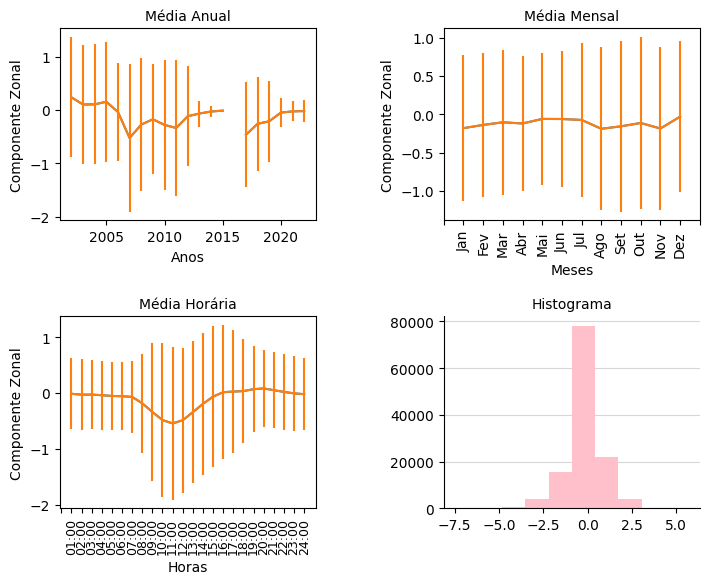

In [18]:
fig,axs = plt.subplots(2,2)

axs[0,0].plot(years,uvyearave)
axs[0,0].errorbar(years,uvyearave,uvyearstd)
axs[0,0].set_title('Média Anual', fontsize=10)
axs[0,0].set_xlabel('Anos')
axs[0,0].set_ylabel('Componente Zonal')

axs[0,1].plot(months,uvmonthave)
axs[0,1].errorbar(months,uvmonthave,uvmonthstd)
axs[0,1].set_title('Média Mensal', fontsize=10)
axs[0,1].set_xlabel('Meses')
axs[0,1].set_ylabel('Componente Zonal')
axs[0,1].set_xticks(range(14), ['', 'Jan','Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez', ''], rotation=90)

axs[1,0].plot(hours,uvhourave)
axs[1,0].errorbar(hours,uvhourave,uvhourstd)
axs[1,0].set_title('Média Horária', fontsize=10)
axs[1,0].set_xlabel('Horas')
axs[1,0].set_ylabel('Componente Zonal')
axs[1,0].set_xticks(range(0, 25), ['', '01:00','02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00','13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '24:00'], rotation=90, fontsize=9)

axs[1,1].hist(uvtudo, color = 'pink')
axs[1,1].set_title('Histograma', fontsize=10)
axs[1,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].grid(alpha=0.5, axis='y')
axs[1,1].set_axisbelow(True)

plt.subplots_adjust(bottom = 4.0,
                    top = 5.0,
                    left = 2.0,
                    right = 3.0,
                    wspace = 0.5,
                    hspace=0.5)

## Meridional Component

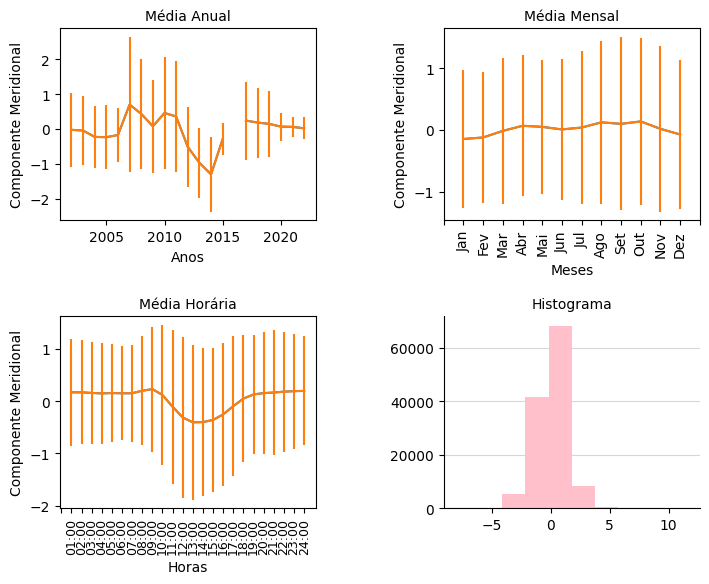

In [19]:
fig,axs = plt.subplots(2,2)

axs[0,0].plot(years,vvyearave)
axs[0,0].errorbar(years,vvyearave,vvyearstd)
axs[0,0].set_title('Média Anual', fontsize=10)
axs[0,0].set_xlabel('Anos')
axs[0,0].set_ylabel('Componente Meridional')

axs[0,1].plot(months,vvmonthave)
axs[0,1].errorbar(months,vvmonthave,vvmonthstd)
axs[0,1].set_title('Média Mensal', fontsize=10)
axs[0,1].set_xlabel('Meses')
axs[0,1].set_ylabel('Componente Meridional')
axs[0,1].set_xticks(range(14), ['', 'Jan','Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez', ''], rotation=90)

axs[1,0].plot(hours,vvhourave)
axs[1,0].errorbar(hours,vvhourave,vvhourstd)
axs[1,0].set_title('Média Horária', fontsize=10)
axs[1,0].set_xlabel('Horas')
axs[1,0].set_ylabel('Componente Meridional')
axs[1,0].set_xticks(range(0, 25), ['', '01:00','02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00','13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '24:00'], rotation=90, fontsize=9)

axs[1,1].hist(vvtudo, color='pink')
axs[1,1].set_title('Histograma', fontsize=10)
axs[1,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].grid(alpha=0.5, axis='y')
axs[1,1].set_axisbelow(True)

plt.subplots_adjust(bottom = 4.0,
                    top = 5.0,
                    left = 2.0,
                    right = 3.0,
                    wspace = 0.5,
                    hspace=0.5)

## Pressure

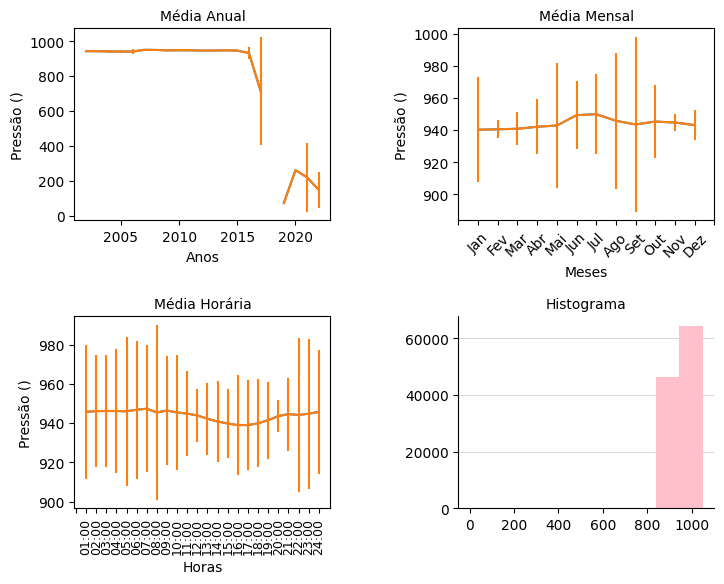

In [20]:
fig,axs = plt.subplots(2,2)

axs[0,0].plot(years,pryearave)
axs[0,0].errorbar(years,pryearave,pryearstd)
axs[0,0].set_title('Média Anual', fontsize=10)
axs[0,0].set_xlabel('Anos')
axs[0,0].set_ylabel('Pressão ()')

axs[0,1].plot(months,prmonthave)
axs[0,1].errorbar(months,prmonthave,prmonthstd)
axs[0,1].set_title('Média Mensal', fontsize=10)
axs[0,1].set_xlabel('Meses')
axs[0,1].set_ylabel('Pressão ()')
axs[0,1].set_xticks(range(14), ['', 'Jan','Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez', ''], rotation=45)

axs[1,0].plot(hours,prhourave)
axs[1,0].errorbar(hours,prhourave,prhourstd)
axs[1,0].set_title('Média Horária', fontsize=10)
axs[1,0].set_xlabel('Horas')
axs[1,0].set_ylabel('Pressão ()')
axs[1,0].set_xticks(range(0, 25), ['', '01:00','02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00','13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '24:00'], rotation=90, fontsize=9)

axs[1,1].hist(prtudo, color='pink')
axs[1,1].set_title('Histograma', fontsize=10)
axs[1,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].grid(alpha=0.5, axis='y')
axs[1,1].set_axisbelow(True)

plt.subplots_adjust(bottom = 4.0,
                    top = 5.0,
                    left = 2.0,
                    right = 3.0,
                    wspace = 0.5,
                    hspace=0.5)

## Percentil 

In [21]:
report.write('Percentil 95 \n')
report.write('Precipitacao: '+str(np.percentile(pptudo,95))+'\n')
report.write('Temp: '+str(np.percentile(tptudo,95))+'\n')
report.write('UR: '+str(np.percentile(urtudo,95))+'\n')
report.write('Rad: '+str(np.percentile(rdtudo,95))+'\n')
report.write('U: '+str(np.percentile(uvtudo,95))+'\n')
report.write('V: '+str(np.percentile(vvtudo,95))+'\n')
report.write('Press: '+str(np.percentile(prtudo,95))+'\n')

report.write('Maximo \n')
report.write('Precipitacao: '+str(np.amax(pptudo))+'\n')
report.write('Temp: '+str(np.amax(tptudo))+'\n')
report.write('UR: '+str(np.amax(urtudo))+'\n')
report.write('Rad: '+str(np.amax(rdtudo))+'\n')
report.write('U: '+str(np.amax(uvtudo))+'\n')
report.write('V: '+str(np.amax(vvtudo))+'\n')
report.write('Press: '+str(np.amax(prtudo))+'\n')

14